# Calculating the absorption probability for 
# UCNs by the Aluminum window for each pass

In [3]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib
import math
import matplotlib.pyplot as plt

## The equation is:
\begin{align}
\ Absorption\_probability = 1 - exp({-\frac{density}{atomic\_weight}\times AvogadroNumber \times ThermalAbsorptionXS \times  thickness \times \frac{v\_therm}{Velocity}}) \
\end{align}

In [5]:
#convert inch to cm
def convert_in_cm(x):
  y = x*2.54
  print(y, "in cm")

convert_in_cm(.003)

0.00762 in cm


In [6]:
#calculation of absorption crosssection
Al = ((95.85 + 98.56)/2)*0.01*0.231
Mg = ((00.80 + 01.20)/2)*0.01*0.063
Si = ((00.40 + 00.80)/2)*0.01*0.171
Fe = ((00.00 + 00.70)/2)*0.01*2.560
Cu = ((00.15 + 00.40)/2)*0.01*3.780
Cr = ((00.04 + 00.35)/2)*0.01*3.050
Zn = ((00.00 + 00.25)/2)*0.01*1.110
Ti = ((00.00 + 00.25)/2)*0.01*6.090
Mn = ((00.00 + 00.15)/2)*0.01*13.30

Total_Crosssection = Al + Mg + Si + Fe + Cu + Cr + Zn + Ti + Mn

print(Total_Crosssection, "in barns")

0.27047705 in barns


# Calculation for thickness = 0.005 in and abs xs = 0.2705 barns

In [7]:
#defining the variables
density = 2.7         # density of aluminum is      = 2.7 gm/cm^3
atomic_weight = 26.9  # atomic weight of Aluminum   = 26.9 atom/ mol
thickness = 0.0127   # thickness of the window     = 0.005 in = 0.0127 cm
avagadro  = 6.023e23  # avagadro number
v_therm = 2200        # velocity of thermal neutron = 2200 m/s
thermal_abs_xs = 0.2705e-24  #total absorption crosssection in cm^2 unit

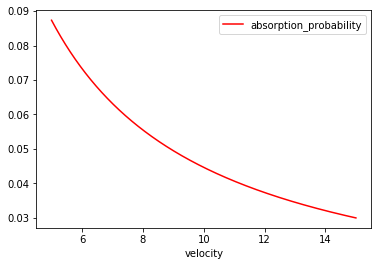

In [8]:
initial_velocity = 5  # velocity in m/s
final_velocity = 15   # velocity in m/s
increment_velocity = 0.001

def my_range(start, end, step):
    while start <= end:
        yield start
        start += step

df = pd.DataFrame({'velocity': [], 'absorption_probability': []})



for i in my_range(initial_velocity, final_velocity, increment_velocity):
    j = 1 - np.exp(-((density/atomic_weight)*avagadro*thermal_abs_xs*thickness*(v_therm/i)))
    df = df.append({'velocity': i, 'absorption_probability': j}, ignore_index=True)
    
#print(df)

df.plot(kind='line',x='velocity',y='absorption_probability',color='red')
plt.show()
    

# Comparison for thickness = 0.003 in and 0.005 in and abs xs = 0.231 barns and 0.2705 barns

In [9]:
#defining the variables
density = 2.7         # density of aluminum is      = 2.7 gm/cm^3
atomic_weight = 26.9  # atomic weight of Aluminum   = 26.9 atom/ mol
thickness = 0.0127   # thickness of the window     = 0.005 in = 0.0127 cm
thickness_old = 0.00762   # thickness of the window     = 0.003 in = 0.00762 cm
avagadro  = 6.023e23  # avagadro number
v_therm = 2200        # velocity of thermal neutron = 2200 m/s
thermal_abs_xs = 0.2705e-24  #total absorption crosssection in cm^2 unit
thermal_abs_xs_old = 0.231e-24  #total absorption crosssection in cm^2 unit

In [10]:
initial_velocity = 5  # velocity in m/s
final_velocity = 15   # velocity in m/s
increment_velocity = 0.001

def my_range(start, end, step):
    while start <= end:
        yield start
        start += step

df = pd.DataFrame({'velocity': [], 'absorption_probability': [], 'absorption_probability_old': []})



for i in my_range(initial_velocity, final_velocity, increment_velocity):
    j = 1 - np.exp(-((density/atomic_weight)*avagadro*thermal_abs_xs*thickness*(v_therm/i)))
    k = 1 - np.exp(-((density/atomic_weight)*avagadro*thermal_abs_xs_old*thickness_old*(v_therm/i)))
    df = df.append({'velocity': i, 'absorption_probability': j, 'absorption_probability_old': k}, ignore_index=True)
    
print("Calculation Done, DF created")
    

Calculation Done, DF created


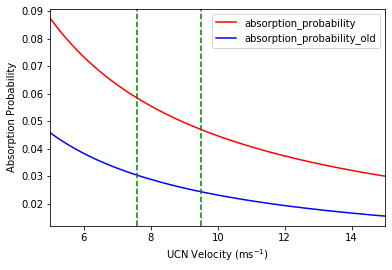

In [117]:
#Plotting the data
ax = plt.gca()
df.plot(kind='line',x='velocity',y='absorption_probability',color='red', ax=ax)
df.plot(kind='line',x='velocity',y='absorption_probability_old',color='blue', ax=ax)
ax.axvline(7.6, color='green', linestyle='--')
ax.axvline(9.5, color='green', linestyle='--')
ax.set_xlabel("UCN Velocity (ms$^{-1}$)")
ax.set_ylabel("Absorption Probability")
plt.show()

5T field gives 300 neV additional kinetic energy to high field seekers. So neutrons that have 0 neV kinetic energy outside the field move at 7.3 m/s in the field and neutrons that have 170 neV kinetic energy outside move at 9.1 m/s.

neutron velocity = 1.38e6 * Sqrt(E)

Where velocity is in cm/s and E is in eV

In [118]:
E1 = 300e-9   #neutron energy in eV
V1 = 1.38e6 * math.sqrt(E1)  #From E=(1/2)*(1.675×10−27 kg)*v^2 and 1eV=1.6×10−19 J

E2 = 470e-9   #neutron energy in eV
V2 = 1.38e6 * math.sqrt(E2)

print("The UCN velocity range is =", round(V1/100,1), "m/s to", round(V2/100,1), "m/s")

The UCN velocity range is = 7.6 m/s to 9.5 m/s
